In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import os
import time
import numpy as np
import pandas as pd

from os import listdir
from io import BytesIO
import requests

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,utils
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from scipy import stats
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import PIL
from PIL import Image

import seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [3]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [4]:
DATA_DIR = 'data/caps_and_shoes_squared/'
IMAGE_SIZE = (28,28)
CLASS_LIST = ['cap','shoes']
BATCH_SIZE = 32

train_path = DATA_DIR + 'train'
validation_path = DATA_DIR + 'val'
test_path = DATA_DIR + 'test'

In [5]:
def plot_images(ims, figsize=(24,12), rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        
        plt.imshow(ims[i].reshape(IMAGE_SIZE[0],IMAGE_SIZE[1]), cmap="gray")

In [6]:
test_img_generator = ImageDataGenerator( rescale = 1./255)
img_generator = ImageDataGenerator(rescale = 1./255, rotation_range = 10, width_shift_range = 0.1, height_shift_range=0.1, zoom_range = 0.1, 
                                   horizontal_flip=True, fill_mode='nearest')
train_validation_img_generator = ImageDataGenerator(validation_split=0.2, rescale = 1./255, rotation_range = 10, width_shift_range = 0.1, height_shift_range=0.1, zoom_range = 0.1, 
                                   horizontal_flip=True, fill_mode='nearest')

train_partial_batches = train_validation_img_generator.flow_from_directory(train_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE, subset='training')

train_validation_batches = train_validation_img_generator.flow_from_directory(train_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE, subset='validation')

train_full_batches = img_generator.flow_from_directory(train_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE)

validation_batches = img_generator.flow_from_directory(validation_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE)
test_batches = test_img_generator.flow_from_directory(test_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical',batch_size=1, shuffle=False)

Found 1832 images belonging to 2 classes.
Found 457 images belonging to 2 classes.
Found 2289 images belonging to 2 classes.
Found 670 images belonging to 2 classes.
Found 326 images belonging to 2 classes.


In [7]:
es_callback = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=36, min_delta=0.001, restore_best_weights = True)

In [8]:
def define_model_architecture_64_32_16():
    model = models.Sequential()
    model.add(Flatten(input_shape = (28,28,1)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [9]:
model = define_model_architecture_64_32_16()
history = model.fit_generator(generator = train_partial_batches, steps_per_epoch=train_partial_batches.samples/BATCH_SIZE, 
                              validation_data = train_validation_batches, validation_steps = train_validation_batches.samples/BATCH_SIZE, 
                              epochs=200, verbose=2, workers=4, callbacks = [es_callback])

Epoch 1/200


W0814 23:53:52.522149 139778535065408 deprecation.py:323] From /home/algolaptop8/anaconda3/envs/tf2-env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


58/57 - 6s - loss: 0.6600 - accuracy: 0.6163 - val_loss: 0.7297 - val_accuracy: 0.6018
Epoch 2/200
58/57 - 6s - loss: 0.6280 - accuracy: 0.6534 - val_loss: 0.6625 - val_accuracy: 0.6477
Epoch 3/200
58/57 - 5s - loss: 0.6251 - accuracy: 0.6638 - val_loss: 0.6466 - val_accuracy: 0.6674
Epoch 4/200
58/57 - 5s - loss: 0.6103 - accuracy: 0.6752 - val_loss: 0.6354 - val_accuracy: 0.6915
Epoch 5/200
58/57 - 6s - loss: 0.6062 - accuracy: 0.6954 - val_loss: 0.6340 - val_accuracy: 0.6805
Epoch 6/200
58/57 - 6s - loss: 0.5923 - accuracy: 0.6878 - val_loss: 0.6392 - val_accuracy: 0.6805
Epoch 7/200
58/57 - 6s - loss: 0.5907 - accuracy: 0.6894 - val_loss: 0.6259 - val_accuracy: 0.6849
Epoch 8/200
58/57 - 6s - loss: 0.5943 - accuracy: 0.6867 - val_loss: 0.6211 - val_accuracy: 0.6871
Epoch 9/200
58/57 - 5s - loss: 0.5734 - accuracy: 0.7003 - val_loss: 0.6270 - val_accuracy: 0.6805
Epoch 10/200
58/57 - 6s - loss: 0.5807 - accuracy: 0.7003 - val_loss: 0.6189 - val_accuracy: 0.6958
Epoch 11/200
58/57 - 

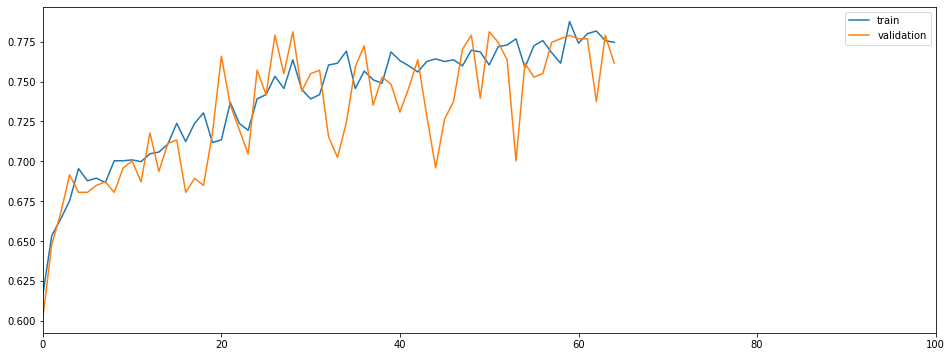

In [11]:
plt.figure(num=None, figsize=(16, 6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlim(0, 100)
plt.show()

In [12]:
test_loss, test_accuracy = model.evaluate_generator(test_batches, workers=4, verbose=0) 
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

Test loss: 0.4826 accuracy: 0.7945


In [13]:
es_callback = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, min_delta=0.005, 
                            baseline=test_accuracy, restore_best_weights = True)

In [14]:
model.fit_generator(generator = train_full_batches, steps_per_epoch=train_full_batches.samples/BATCH_SIZE, 
                              validation_data = validation_batches, validation_steps = validation_batches.samples/BATCH_SIZE, 
                              epochs=100, verbose=2, workers=4)

Epoch 1/100
72/71 - 7s - loss: 0.5222 - accuracy: 0.7501 - val_loss: 0.4934 - val_accuracy: 0.7701
Epoch 2/100
72/71 - 6s - loss: 0.5208 - accuracy: 0.7457 - val_loss: 0.4905 - val_accuracy: 0.7627
Epoch 3/100
72/71 - 7s - loss: 0.5268 - accuracy: 0.7462 - val_loss: 0.4805 - val_accuracy: 0.7761
Epoch 4/100
72/71 - 7s - loss: 0.5266 - accuracy: 0.7527 - val_loss: 0.5034 - val_accuracy: 0.7776
Epoch 5/100
72/71 - 8s - loss: 0.5157 - accuracy: 0.7501 - val_loss: 0.4889 - val_accuracy: 0.7836
Epoch 6/100
72/71 - 8s - loss: 0.5209 - accuracy: 0.7519 - val_loss: 0.5515 - val_accuracy: 0.7164
Epoch 7/100
72/71 - 8s - loss: 0.5172 - accuracy: 0.7658 - val_loss: 0.4981 - val_accuracy: 0.7791
Epoch 8/100
72/71 - 7s - loss: 0.5069 - accuracy: 0.7497 - val_loss: 0.4901 - val_accuracy: 0.7687
Epoch 9/100
72/71 - 7s - loss: 0.5181 - accuracy: 0.7492 - val_loss: 0.4615 - val_accuracy: 0.8104
Epoch 10/100
72/71 - 7s - loss: 0.5120 - accuracy: 0.7671 - val_loss: 0.4781 - val_accuracy: 0.7940
Epoch 11/

72/71 - 8s - loss: 0.4160 - accuracy: 0.8091 - val_loss: 0.4110 - val_accuracy: 0.8104
Epoch 84/100
72/71 - 7s - loss: 0.4196 - accuracy: 0.8126 - val_loss: 0.3822 - val_accuracy: 0.8433
Epoch 85/100
72/71 - 7s - loss: 0.4283 - accuracy: 0.7955 - val_loss: 0.4101 - val_accuracy: 0.8164
Epoch 86/100
72/71 - 8s - loss: 0.4285 - accuracy: 0.8065 - val_loss: 0.4548 - val_accuracy: 0.7970
Epoch 87/100
72/71 - 8s - loss: 0.4261 - accuracy: 0.8078 - val_loss: 0.4043 - val_accuracy: 0.8224
Epoch 88/100
72/71 - 7s - loss: 0.4254 - accuracy: 0.8052 - val_loss: 0.4037 - val_accuracy: 0.8164
Epoch 89/100
72/71 - 8s - loss: 0.4135 - accuracy: 0.8087 - val_loss: 0.4213 - val_accuracy: 0.8104
Epoch 90/100
72/71 - 7s - loss: 0.4215 - accuracy: 0.8091 - val_loss: 0.4165 - val_accuracy: 0.8030
Epoch 91/100
72/71 - 8s - loss: 0.4135 - accuracy: 0.8126 - val_loss: 0.4280 - val_accuracy: 0.7866
Epoch 92/100
72/71 - 7s - loss: 0.4220 - accuracy: 0.8108 - val_loss: 0.4260 - val_accuracy: 0.7910
Epoch 93/100


In [15]:
test_loss, test_accuracy = model.evaluate_generator(test_batches, workers=4, verbose=0) 
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

Test loss: 0.3791 accuracy: 0.8313


In [18]:
test_batches.reset()
actual_labels = []
X_test = []
i = 0
max_iter = test_batches.samples
for data, label in test_batches:
    actual_labels.append(label)
    X_test.append(data)
    i += 1
    if i == max_iter:
        break
        
actual_labels = np.concatenate(actual_labels)
X_test = np.concatenate(X_test)

In [19]:
test_batches.reset()
predictions = model.predict_generator(test_batches)

In [20]:
test_prediction_data = pd.DataFrame(np.hstack([predictions,actual_labels]).astype("float16"), columns=['predicted_cap','predicted_shoes','actual cap','actual_shoes'])
test_prediction_data[:5]

,predicted_cap,predicted_shoes,actual cap,actual_shoes
0,0.978516,0.021439,1.0,0.0
1,0.996094,0.003792,1.0,0.0
2,0.914551,0.085449,1.0,0.0
3,0.880371,0.119751,1.0,0.0
4,0.188232,0.812012,1.0,0.0


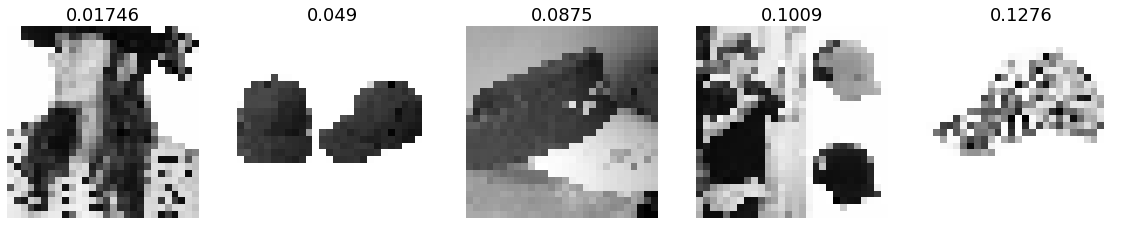

In [21]:
top_wrong_caps_ix = test_prediction_data[test_prediction_data['actual cap'] == 1]['predicted_cap'].sort_values().index.values[:5]
top_wrong_caps_values = test_prediction_data[test_prediction_data['actual cap'] == 1]['predicted_cap'].sort_values().values[:5]
plot_images(X_test[top_wrong_caps_ix],titles=top_wrong_caps_values)

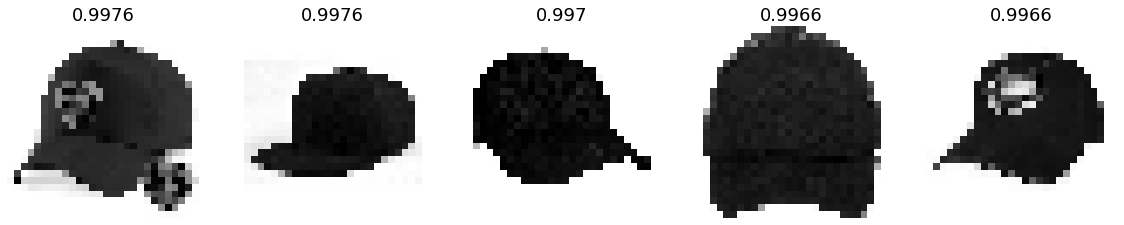

In [22]:
top_correct_caps_ix = test_prediction_data[test_prediction_data['actual cap'] == 1]['predicted_cap'].sort_values(ascending=False).index.values[:5]
top_correct_caps_values = test_prediction_data[test_prediction_data['actual cap'] == 1]['predicted_cap'].sort_values(ascending=False).values[:5]
plot_images(X_test[top_correct_caps_ix],titles=top_correct_caps_values)

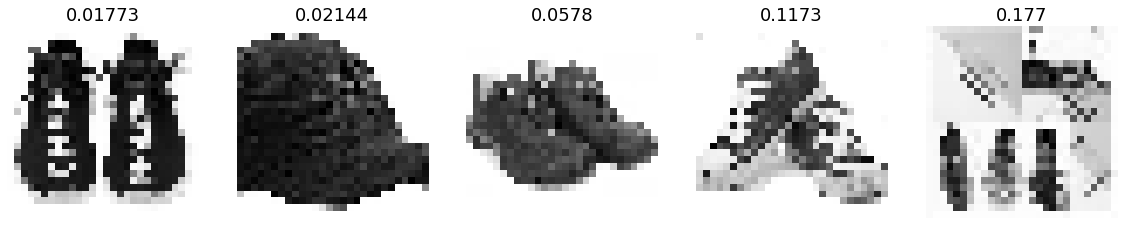

In [23]:
top_wrong_shoes_ix = test_prediction_data[test_prediction_data['actual_shoes'] == 1]['predicted_shoes'].sort_values().index.values[:5]
top_wrong_shoes_values = test_prediction_data[test_prediction_data['actual_shoes'] == 1]['predicted_shoes'].sort_values().values[:5]
plot_images(X_test[top_wrong_shoes_ix],titles=top_wrong_shoes_values)

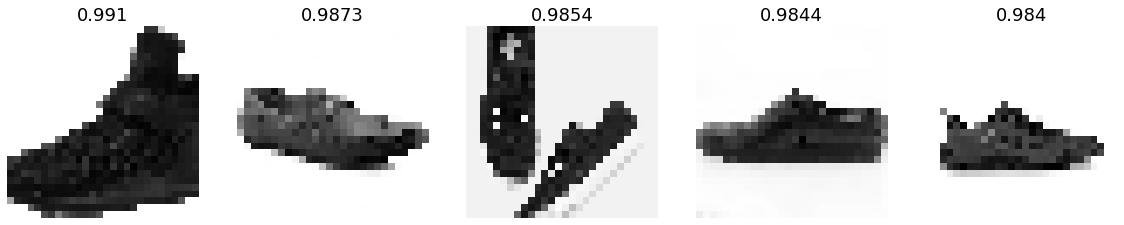

In [24]:
top_correct_shoes_ix = test_prediction_data[test_prediction_data['actual_shoes'] == 1]['predicted_shoes'].sort_values(ascending=False).index.values[:5]
top_correct_shoes_values = test_prediction_data[test_prediction_data['actual_shoes'] == 1]['predicted_shoes'].sort_values(ascending=False).values[:5]
plot_images(X_test[top_correct_shoes_ix],titles=top_correct_shoes_values)

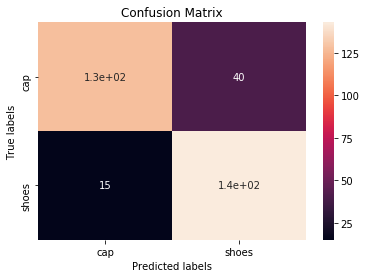

In [25]:
labels = ['cap','shoes']
cm = confusion_matrix(np.argmax(actual_labels ,axis=1), np.argmax(predictions, axis=1), [0,1])

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

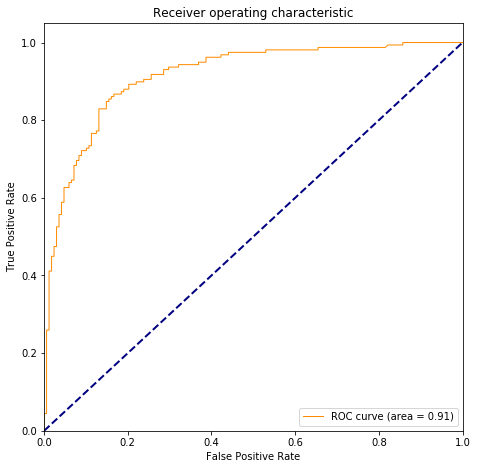

In [26]:
fpr, tpr, thresholds = roc_curve(actual_labels[:,1], predictions[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7.5, 7.5))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()